# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

import tensorflow as tf
from keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv("train.csv")

test=pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")

# Data Preprocessing

# Train Data

In [3]:
train.head(10)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
5,355.0,1.74,1.0,45.00,0,26.625,71.625,1
6,453.0,2.22,1.0,52.50,0,6.000,58.500,0
7,1288.0,5.21,1.0,116.25,36,26.325,178.575,1
8,134.0,1.48,1.0,33.75,0,6.000,39.750,0
9,980.0,3.48,1.0,90.00,0,6.000,96.000,0


In [4]:
train.shape

(209673, 8)

In [5]:
train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


# Test Data

In [7]:
test.head(10)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0
5,933.0,9.01,2.0,0,0,26.625,0,1
6,266.0,1.00,1.0,0,10,5.900,0,0
7,793.0,3.03,1.0,0,0,6.000,0,0
8,748.0,1.13,1.0,0,0,6.000,0,0
9,893.0,10.81,2.0,0,0,2.250,0,0


In [8]:
test.shape

(89861, 8)

In [9]:
test.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,89861.000000,89861.000000,89861.000000,89861.0,89861.000000,89861.000000,89861.0,89861.000000
mean,1148.178164,7.263529,1.286732,0.0,13.031048,15.190636,0.0,0.282280
std,4611.480867,554.965869,0.920910,0.0,18.692751,12.677904,0.0,0.450112
min,0.000000,0.020000,0.000000,0.0,0.000000,-0.500000,0.0,0.000000
25%,446.000000,1.950000,1.000000,0.0,0.000000,6.000000,0.0,0.000000
50%,705.000000,3.200000,1.000000,0.0,9.000000,9.750000,0.0,0.000000
75%,1094.000000,5.730000,1.000000,0.0,20.000000,26.450000,0.0,1.000000
max,86395.000000,145517.600000,9.000000,0.0,719.000000,431.500000,0.0,1.000000


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89861 entries, 0 to 89860
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_duration       89861 non-null  float64
 1   distance_traveled   89861 non-null  float64
 2   num_of_passengers   89861 non-null  float64
 3   fare                89861 non-null  int64  
 4   tip                 89861 non-null  int64  
 5   miscellaneous_fees  89861 non-null  float64
 6   total_fare          89861 non-null  int64  
 7   surge_applied       89861 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 5.5 MB


In [11]:
#Remove the values we need to predict
test.drop(['fare','total_fare'],axis=1,inplace=True)

In [12]:
features = train.columns.to_list()

# Outlier Analysis

In [13]:
# Distribution Plot
def box_hist(a, feat, outlier_an=1):
    
    if outlier_an == 1:
        fig, ax = plt.subplots(2, 2, figsize=(12,4))
        plt.subplots_adjust(hspace=0)

        flierprops = dict(marker='o', markerfacecolor='orange', markeredgecolor='black', markersize=6)

        # Create BoxPlot
        ax[0][0].boxplot(x=np.sqrt(a[feat]), flierprops=flierprops, vert=False)
        ax[0][0].spines.bottom.set_visible(False)
        ax[0][0].set_xticks([])
        ax[0][0].set_yticks([])
        ax[0][0].set_title(feat.upper())

        # Create HistPlot
        counts, bin_edges, _ = ax[1][0].hist(x=np.sqrt(a[feat]), color='orange',edgecolor='black', bins=20)
        ax[1][0].set_yscale('log')
        ax[1][0].spines.top.set_visible(False)
        ax[1][0].set_xlabel('scale: square root')
        ax[1][0].set_ylabel('scale: logarithmic')
        
        #print(counts)
        #print(bin_edges)
    
        # Add a horizontal line at y-coordinate
        ax[1][0].axhline(y=10, color='black', linestyle='--', label='Ouliers')
        
        bin_index = np.where(counts <= 10)[0][0]
        x_cor = np.round(bin_edges[bin_index], 3)
        
        #print(bin_index)
        #print(x_cor)

        # Adding Text
        ax[1][0].text(x_cor +2, 70, 'Pottential Outliers', color='black')
        ax[1][0].text(x_cor +2, 20, f"(x,y) = ({x_cor},10)", color = 'black')
        
        # Second Plot After removal of Outliers
        b = a[a[feat]< x_cor**2]
        #print(b)

        # Create BoxPlot
        ax[0][1].boxplot(x=np.sqrt(b[feat]), flierprops=flierprops, vert=False)
        ax[0][1].spines.bottom.set_visible(False)
        ax[0][1].set_xticks([])
        ax[0][1].set_yticks([])
        ax[0][1].set_title(feat.upper() + ' AFTER OUTLIERS')

        # Create HistPlot
        counts, bin_edges, _ = ax[1][1].hist(x=np.sqrt(b[feat]), color='orange',edgecolor='black', bins=20)
        ax[1][1].set_yscale('log')
        ax[1][1].spines.top.set_visible(False)
        ax[1][1].set_xlabel('scale: square root')
        ax[1][1].set_ylabel('scale: logarithmic')
        
        #print(a[~(a[feat] < x_cor**2)])

        return a[~(a[feat] < x_cor**2)]
        
    else:
        fig, ax = plt.subplots(2, 1, figsize=(6,4))
        plt.subplots_adjust(hspace=0)

        flierprops = dict(marker='o', markerfacecolor='orange', markeredgecolor='black', markersize=6)

        # Create BoxPlot
        ax[0].boxplot(x=np.sqrt(a[feat]), flierprops=flierprops, vert=False)
        ax[0].spines.bottom.set_visible(False)
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[0].set_title(feat.upper())

        # Create HistPlot
        counts, bin_edges, _ = ax[1].hist(x=np.sqrt(a[feat]), color='orange',edgecolor='black', bins=20)
        ax[1].set_yscale('log')
        ax[1].spines.top.set_visible(False)
        ax[1].set_xlabel('scale: square root')
        ax[1].set_ylabel('scale: logarithmic')
    
    plt.show()

Fare

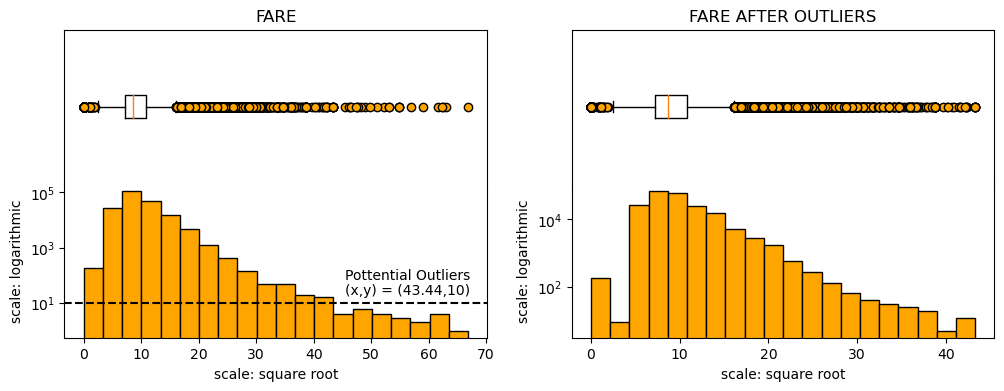

In [14]:
df = box_hist(train, 'fare')

In [15]:
df.shape

(24, 8)

In [16]:
train.drop(df.index, inplace=True)

Number of passengers

In [17]:
train['num_of_passengers'].value_counts()

1.0    179212
2.0     17891
5.0      4713
6.0      3382
3.0      2756
4.0       907
0.0       753
8.0        25
9.0         8
7.0         2
Name: num_of_passengers, dtype: int64

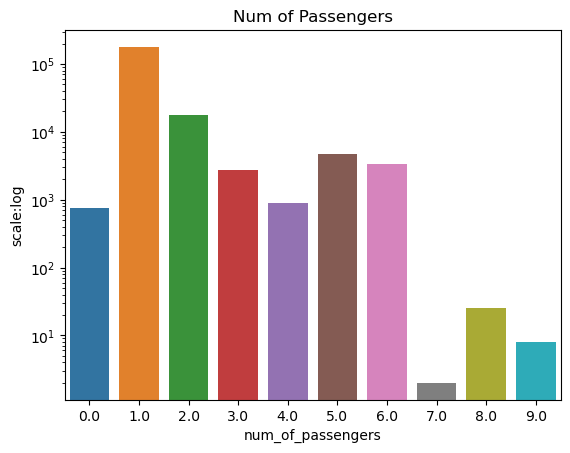

In [18]:
sns.countplot(x='num_of_passengers', data=train)
plt.yscale('log')
plt.ylabel('scale:log')
plt.title('Num of Passengers')
plt.show()

In [19]:
train.drop((train[(train['num_of_passengers']>6)].index),axis=0,inplace=True)

Distance Travelled

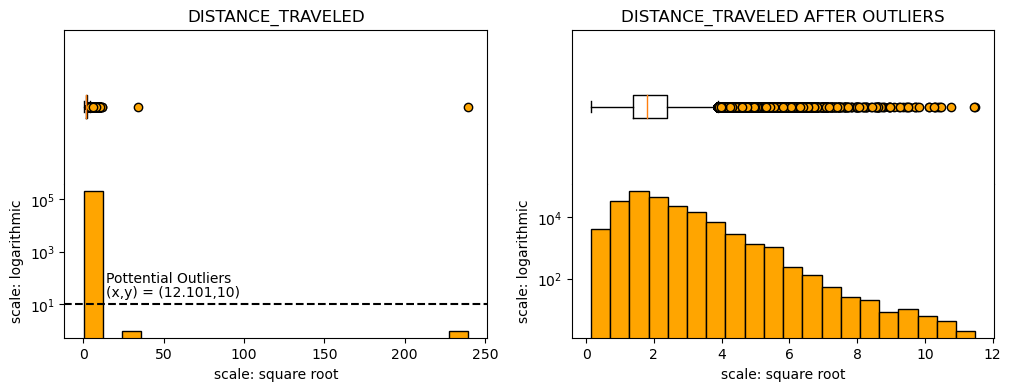

In [20]:
df= box_hist(train, 'distance_traveled')

In [21]:
df.shape

(2, 8)

In [22]:
train.drop(df.index,inplace=True)

Distance in Meters

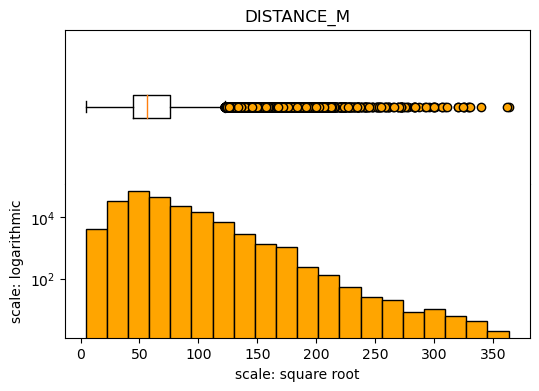

In [23]:
train['distance_m'] = train['distance_traveled'] * 1000

box_hist(train, 'distance_m', outlier_an=0)

In [24]:
train.shape

(209612, 9)

Tip

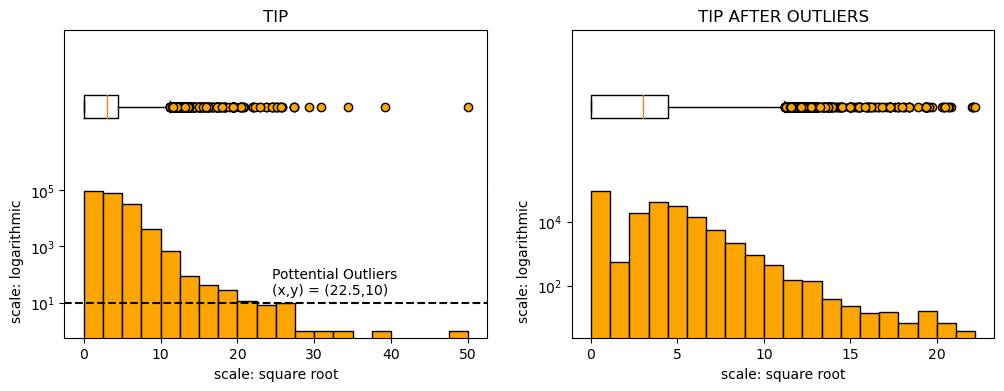

In [25]:
df= box_hist(train, 'tip')

In [26]:
df.shape

(23, 9)

In [27]:
train.drop(df.index, inplace=True)

Miscellaneous Fees

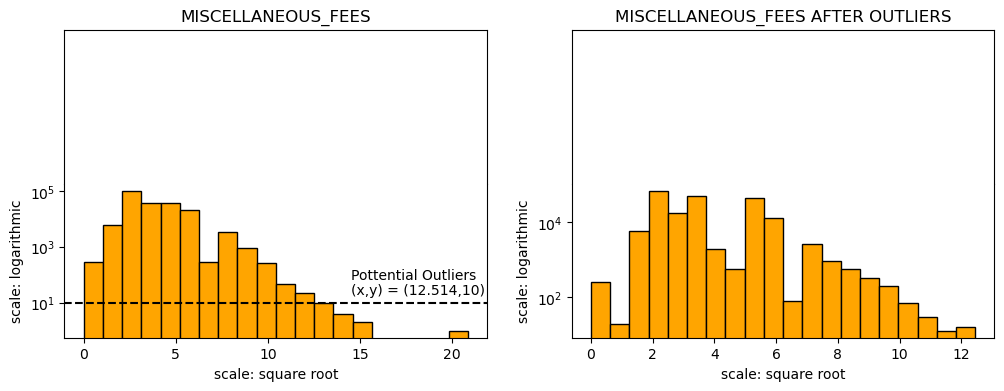

In [28]:
df= box_hist(train, 'miscellaneous_fees')

In [29]:
df.shape

(17, 9)

In [30]:
train.drop(df.index, inplace=True)

Trip Duration

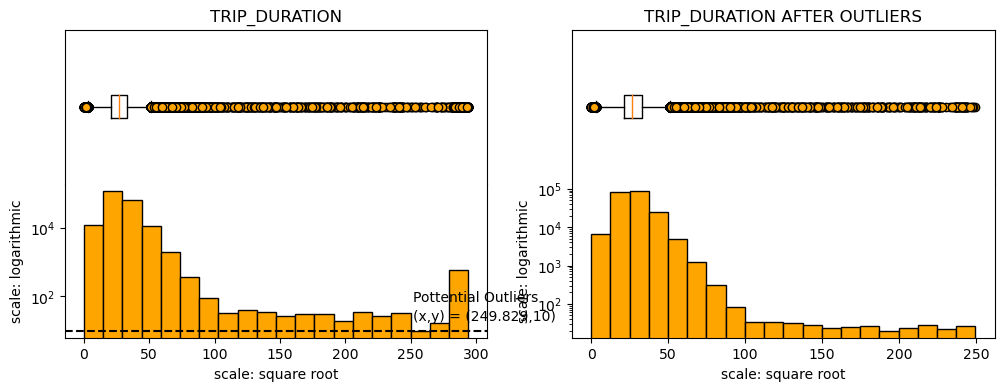

In [31]:
df= box_hist(train, 'trip_duration')

In [32]:
df.shape

(628, 9)

In [33]:
train.drop(df.index, inplace=True)

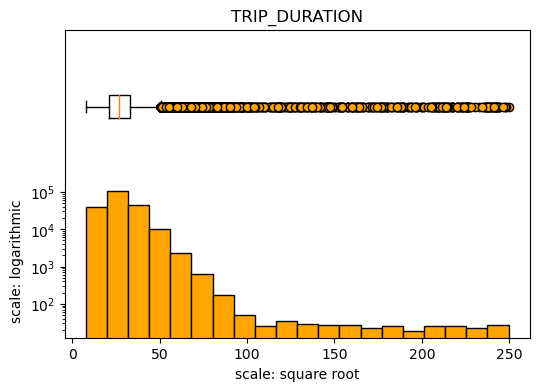

206286


In [34]:
a = train[(train['trip_duration'] > 60)]
box_hist(a, 'trip_duration', outlier_an=0)
print(len(a))
train=a

Speed

In [35]:
# speed=distance/time
train['speed']=train['distance_m']/ train['trip_duration']

In [36]:
train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,distance_m,speed
count,206286.000000,206286.000000,206286.000000,206286.000000,206286.000000,206286.000000,206286.000000,206286.000000,206286.000000,206286.000000
mean,934.602789,4.813297,1.292061,99.031266,12.959847,15.242703,127.233816,0.284135,4813.296976,5.310014
std,1507.482968,4.929158,0.928038,78.172500,17.744551,12.425830,91.663861,0.451002,4929.158432,2.742511
min,61.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000,20.000000,0.000778
25%,455.000000,2.000000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000,2000.000000,3.774597
50%,712.000000,3.220000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000,3220.000000,4.720670
75%,1100.000000,5.780000,1.000000,116.250000,20.000000,26.500000,152.250000,1.000000,5780.000000,6.116407
max,62252.000000,131.890000,6.000000,1875.000000,494.000000,155.000000,2255.400000,1.000000,131890.000000,429.420290


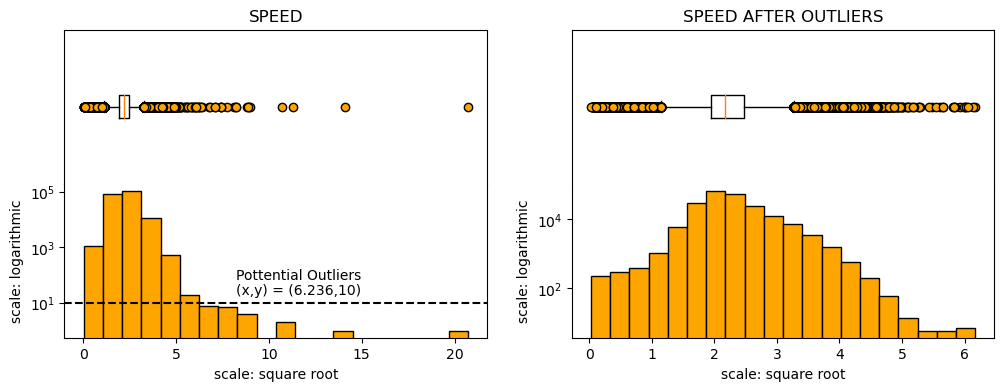

In [37]:
df=box_hist(train,'speed')

In [38]:
df.shape

(23, 10)

In [39]:
train.drop(df.index ,inplace=True)

Set threshold to 100, as the speed in real life can be upto 22m/s(80kmph) being at some norm

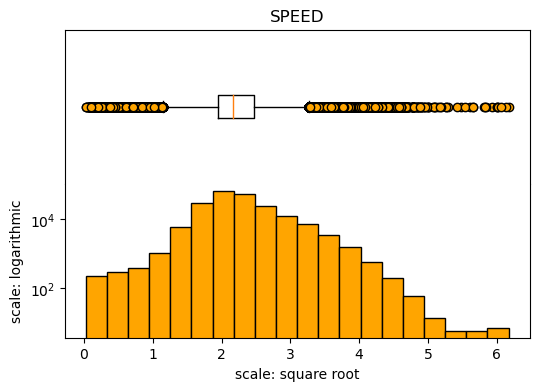

205215


In [40]:
a=train[(train['speed']<23)&(train['speed']>1)]
box_hist(train, 'speed', outlier_an=0)
print(len(a))

In [41]:
train=a
train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,distance_m,speed
count,205215.000000,205215.00000,205215.000000,205215.000000,205215.000000,205215.000000,205215.000000,205215.000000,205215.000000,205215.000000
mean,889.807651,4.82185,1.292537,98.887406,12.983193,15.266200,127.136799,0.285023,4821.850060,5.319507
std,737.805851,4.91716,0.929275,77.388402,17.675013,12.429602,91.019410,0.451427,4917.160307,2.420342
min,61.000000,0.08000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000,80.000000,1.002445
25%,455.000000,2.00000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000,2000.000000,3.789301
50%,712.000000,3.23000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000,3230.000000,4.729730
75%,1097.000000,5.78000,1.000000,116.250000,20.000000,26.500000,152.250000,1.000000,5780.000000,6.124661
max,37489.000000,131.89000,6.000000,1875.000000,494.000000,155.000000,2255.400000,1.000000,131890.000000,22.981818


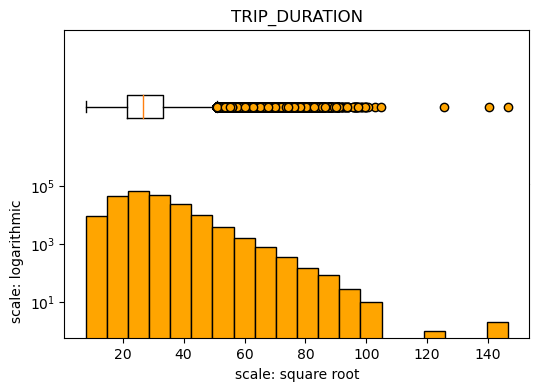

205167


In [42]:
a=train[(train['speed']>5)|(train['trip_duration']<10000)]
box_hist(a, 'trip_duration', outlier_an=0)
print(len(a))


In [43]:
train=a

# Test Data 

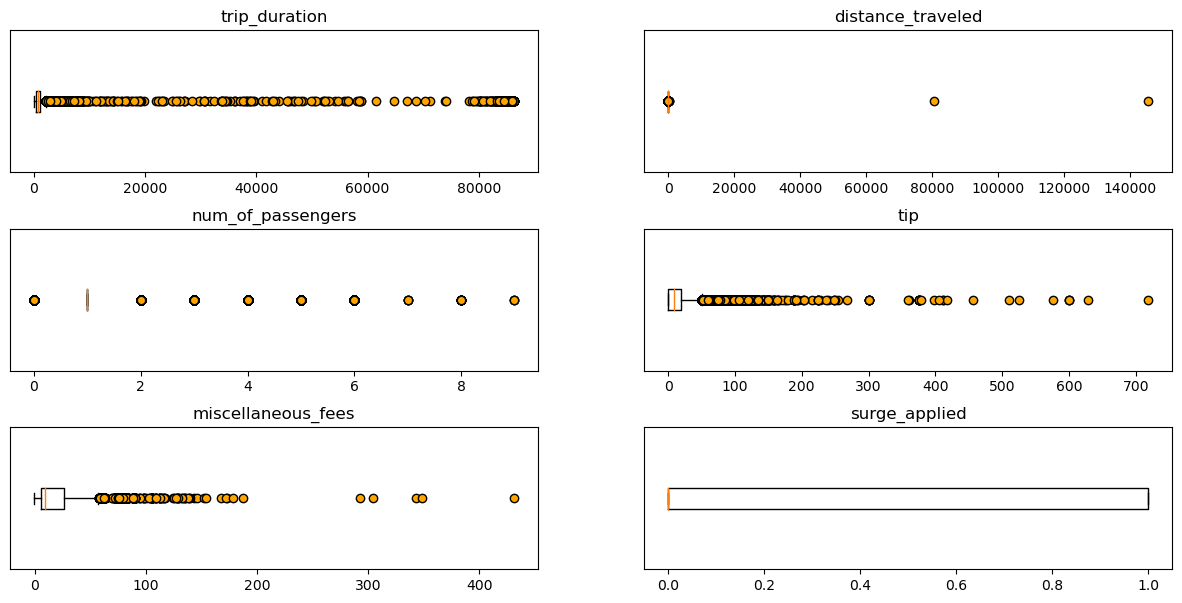

In [44]:
features_test = test.columns.to_list()

fig, axes = plt.subplots(3, 2, figsize=(15,7))
plt.subplots_adjust(hspace=0.4)

flierprops = dict(marker='o', markerfacecolor='orange', markersize=6)
for ax, numerical_feature in zip(axes.reshape(-1), features_test):
    ax.boxplot(x=test[numerical_feature], flierprops=flierprops, vert=False)
    ax.set_title(numerical_feature)
    ax.set_yticks([])

Replacing Outliers

In [45]:
test.loc[test[(test['distance_traveled'] > 12.1**2) | (test['distance_traveled'] < 0)].index, 'distance_traveled'] = np.nan
test.loc[test[(test['tip'] > 22.5**2)].index, 'tip'] = np.nan
test.loc[test[(test['miscellaneous_fees'] > 12.514**2)].index, 'miscellaneous_fees'] = np.nan
test.loc[test[(test['trip_duration'] < 60) | (test['trip_duration'] > 249.82**2)].index, 'trip_duration'] = np.nan

# num of passengers
test.loc[test[(test['num_of_passengers'] > 6)].index, 'num_of_passengers'] = np.nan

Distance of meters

In [46]:
test['distance_m'] = test['distance_traveled'] * 1000

Create speed feature

In [47]:
test['speed'] = test['distance_m'] / test['trip_duration']

In [48]:
test.loc[test[(test['speed'] > 22) | (test['speed'] < 0)].index, ['speed', 'trip_duration', 'distance_traveled', 'distance_m']] = np.nan
test.loc[test[(test['speed']<10) & (test['trip_duration'] > 10000)].index, ['speed', 'trip_duration', 'distance_traveled', 'distance_m']] = np.nan

In [49]:
test.isnull().sum()

trip_duration         1577
distance_traveled      172
num_of_passengers       21
tip                      8
miscellaneous_fees      10
surge_applied            0
distance_m             172
speed                 1581
dtype: int64

In [50]:
test.describe()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied,distance_m,speed
count,88284.000000,89689.000000,89840.000000,89853.000000,89851.000000,89861.000000,89689.000000,88280.000000
mean,884.578723,4.721611,1.285174,12.979255,15.163404,0.282280,4721.610900,5.301140
std,701.305851,4.793622,0.915319,17.860433,12.375805,0.450112,4793.621694,2.430442
min,60.000000,0.020000,0.000000,0.000000,-0.500000,0.000000,20.000000,0.007536
25%,455.000000,1.950000,1.000000,0.000000,6.000000,0.000000,1950.000000,3.771222
50%,710.000000,3.190000,1.000000,9.000000,9.750000,0.000000,3190.000000,4.724243
75%,1094.000000,5.710000,1.000000,20.000000,26.450000,1.000000,5710.000000,6.131398
max,26956.000000,114.390000,6.000000,456.000000,154.500000,1.000000,114390.000000,21.733535


In [51]:
test.shape,train.shape

((89861, 8), (205167, 10))

# KNN Imputer

In [52]:
features.append('speed')
features.append('distance_m')

In [53]:
features.remove('fare')
features.remove('total_fare')

In [54]:
from sklearn.impute import KNNImputer
imp= KNNImputer(n_neighbors=10, missing_values=np.nan)

imp.fit(train[features])
test[features] = imp.transform(test[features])

In [55]:
test.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
tip                   0
miscellaneous_fees    0
surge_applied         0
distance_m            0
speed                 0
dtype: int64

# Data Vizualization

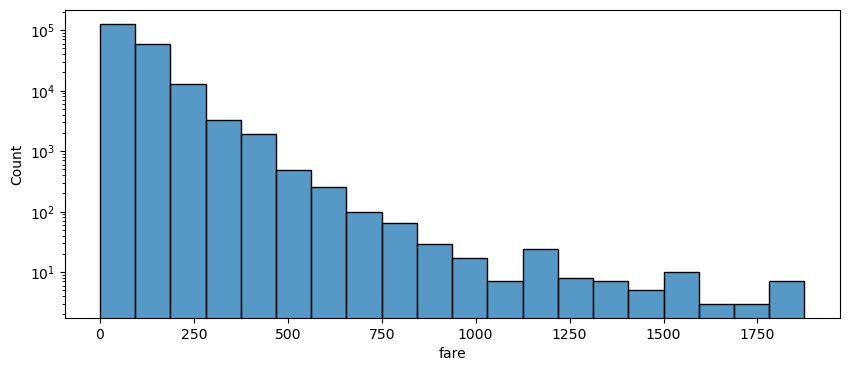

In [56]:
plt.figure(figsize=(10,4))
sns.histplot(data=train, x='fare', bins=20)
plt.yscale('log')
plt.show()

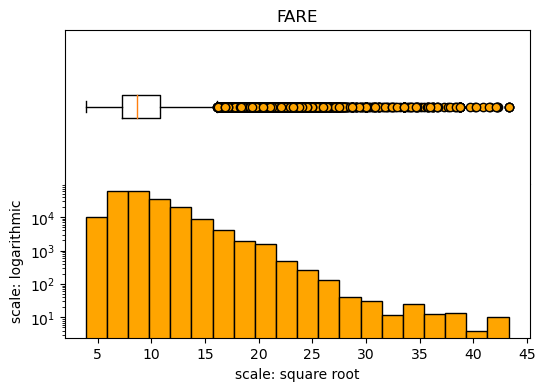

In [57]:
g = train[train['fare']>10]
box_hist(g, 'fare', outlier_an=0)
train = g

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(data = train, x="trip_duration", y="fare", color='orange', edgecolors= 'black', s=train['fare']*2, alpha=0.70)
plt.xlabel('Trip Duration in seconds, scale: Logarithmic')
plt.ylabel('Fare, scale: Logarithmic')
plt.xscale('log')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(data = train, x="distance_traveled", y="fare", color='orange', edgecolors= 'black', s=train['fare']*2, alpha=0.70)
plt.xlabel('Distance Traveled in kms, scale: Logarithmic')
plt.ylabel('Fare, scale: Logarithmic')
plt.xscale('log')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(data = train,y='fare', x="speed", color='orange', edgecolors= 'black', alpha=0.8, s=train['fare']*2)
plt.xlabel('Speed in mps')
plt.ylabel('fare')
plt.yscale('log')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(data = train, x="trip_duration", y="distance_traveled", color='orange', edgecolors= 'black', s=train['speed']**2, alpha=0.8)
plt.xlabel('trip duration in sec, scale: Logarithmic')
plt.ylabel('distance traveled in km, scale: Logarithmic')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(data = train, x="trip_duration", y="distance_traveled", color='orange', edgecolors= 'black', s=train['fare']*2, alpha=0.75)
plt.xlabel('trip duration in sec, scale: Logarithmic')
plt.ylabel('distance traveled in km, scale: Logarithmic')
plt.xscale('log')
plt.yscale('log')
plt.show()

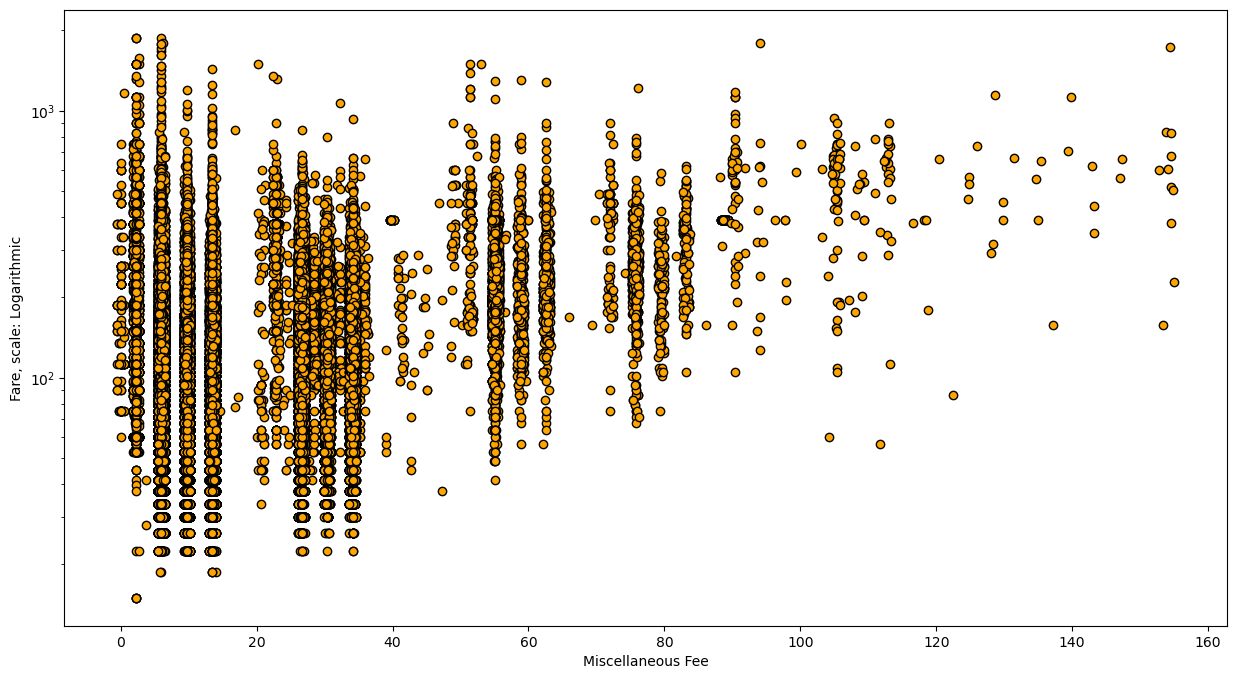

In [63]:
plt.figure(figsize=(15,8))
plt.scatter(data = train, x="miscellaneous_fees", y="fare", color='orange', edgecolors= 'black')
plt.xlabel('Miscellaneous Fee')
plt.ylabel('Fare, scale: Logarithmic')
plt.yscale('log')
plt.show()

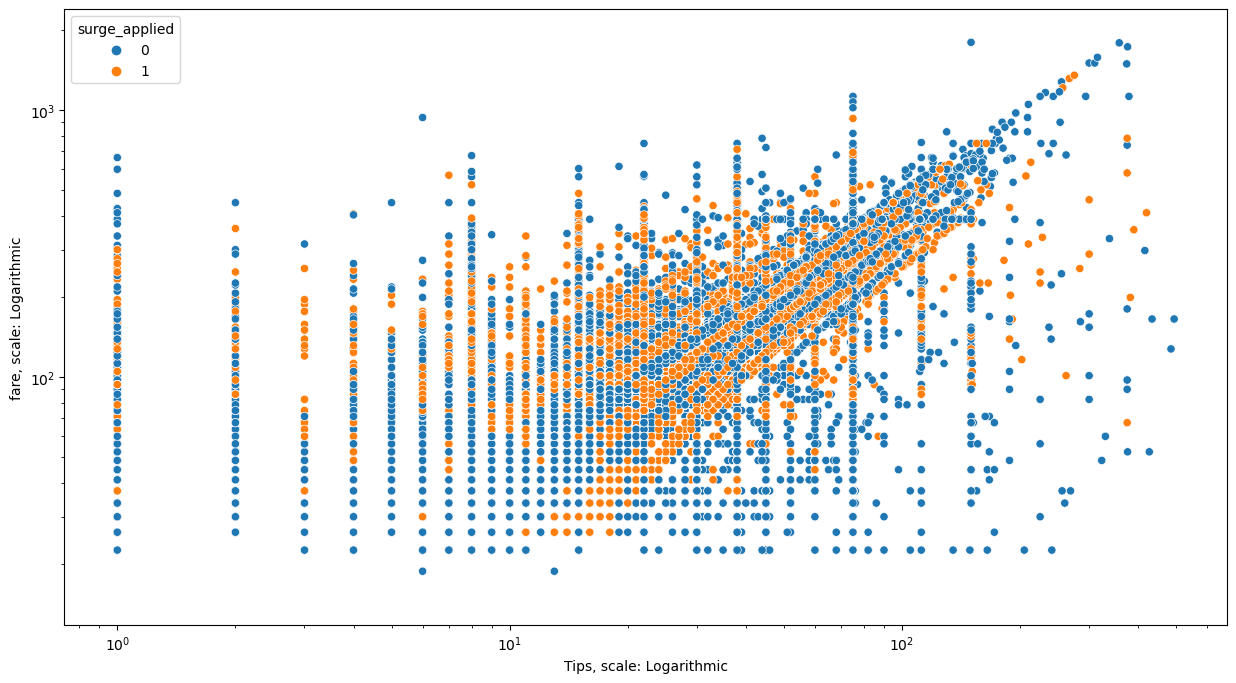

In [64]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = train, x="tip", y= "fare", hue='surge_applied')
plt.xlabel('Tips, scale: Logarithmic')
plt.ylabel('fare, scale: Logarithmic')
plt.xscale('log')
plt.yscale('log')
plt.show()

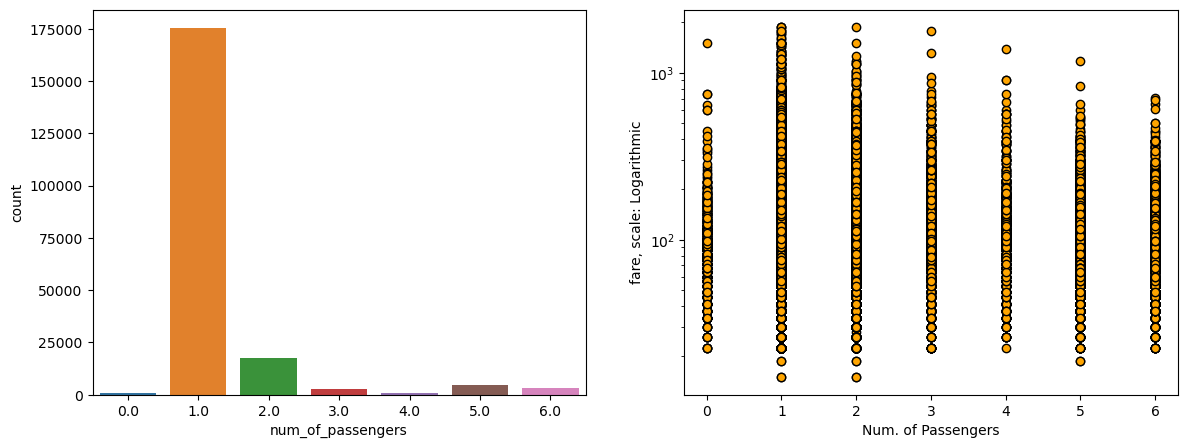

In [65]:
f,ax = plt.subplots(1,2, figsize=(14,5))
sns.countplot(x='num_of_passengers', data=train, ax=ax[0])
ax[1].scatter(x='num_of_passengers', y='fare', data=train, color='orange', edgecolors= 'black')
ax[1].set_xlabel('Num. of Passengers')
ax[1].set_ylabel('fare, scale: Logarithmic')
ax[1].set_yscale('log')
plt.show()

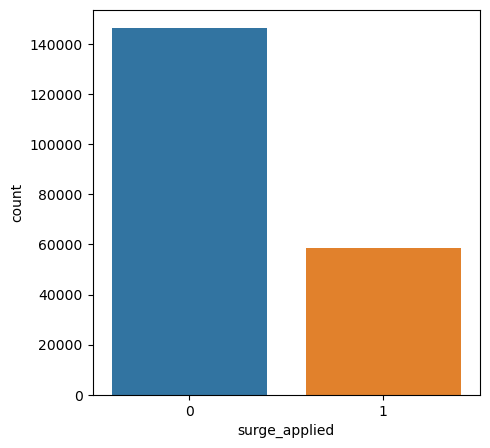

In [66]:
plt.figure(figsize=(5,5))
sns.countplot(x='surge_applied', data=train)
plt.show()

# Model Training

In [67]:
features=train.columns.to_list()
features

['trip_duration',
 'distance_traveled',
 'num_of_passengers',
 'fare',
 'tip',
 'miscellaneous_fees',
 'total_fare',
 'surge_applied',
 'distance_m',
 'speed']

Data Processing 

In [68]:
features.remove('fare')
features.remove('total_fare')
features.remove('speed')
features.remove('distance_m')
X = train[features]
y = train['fare']

Train - Test Split

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=1)

Feature Scaling

In [70]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

Correlation Map

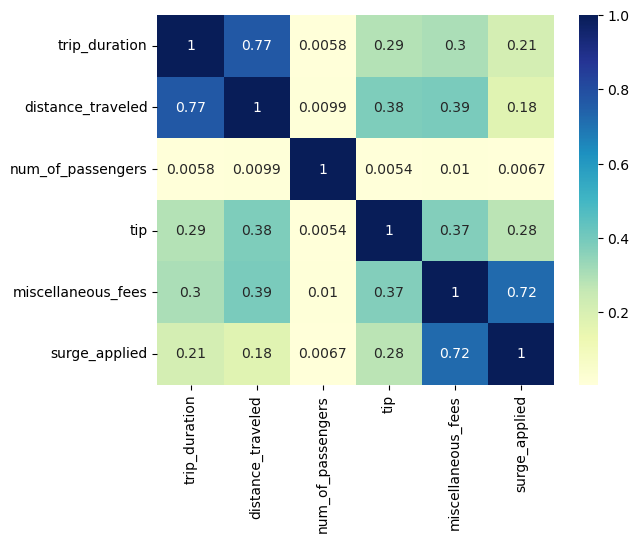

In [71]:
sns.heatmap(data=X.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

pipeline1 = Pipeline([('linearregression', LinearRegression())])

param_grid = {'linearregression__fit_intercept': [True, False],
              'linearregression__copy_X': [True, False]
              }

grid_search1 = GridSearchCV(pipeline1, param_grid, cv=5)
grid_search1.fit(xtrain, ytrain)

print('Parameters : ', grid_search1.best_params_,'\nAccuracy Score : ', grid_search1.best_score_)

Parameters :  {'linearregression__copy_X': True, 'linearregression__fit_intercept': True} 
Accuracy Score :  0.8689422654106116


In [73]:
ypred1 = grid_search1.predict(xtest)
ypred1 = np.absolute(ypred1)


rmsle1 = np.sqrt(mean_squared_log_error(ytest, ypred1))
print(f"Validation RMSLE: {rmsle1}")

Validation RMSLE: 0.13034931500694102


In [74]:
sc1 = r2_score(ytest, ypred1)
sc1

0.8877762899137928

# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

pipeline2 = Pipeline([('dtr2',DecisionTreeRegressor(random_state=42))])

param_grid2 = {'dtr2__max_depth': [5, 10],
              'dtr2__min_samples_split': [2, 5],
              'dtr2__min_samples_leaf': [1, 2, 4],
              'dtr2__max_leaf_nodes': [None, 5, 10]
             }

grid_search2 = GridSearchCV(pipeline2,param_grid2,cv=15)
grid_search2.fit(xtrain,ytrain)

print('Parameters : ', grid_search2.best_params_,'\nAccuracy Score : ', grid_search2.best_score_)


Parameters :  {'dtr2__max_depth': 10, 'dtr2__max_leaf_nodes': None, 'dtr2__min_samples_leaf': 4, 'dtr2__min_samples_split': 2} 
Accuracy Score :  0.8927239980630116


In [76]:
ypred2 = grid_search2.predict(xtest)
#ypred2=np.absolute(ypred2)

rmsle2 = np.sqrt(mean_squared_log_error(ytest,ypred2))
print(f"Validation RMSLE: {rmsle2}")

sc2 = r2_score(ytest, ypred2)
sc2


Validation RMSLE: 0.09535659765671113


0.9099367343498475

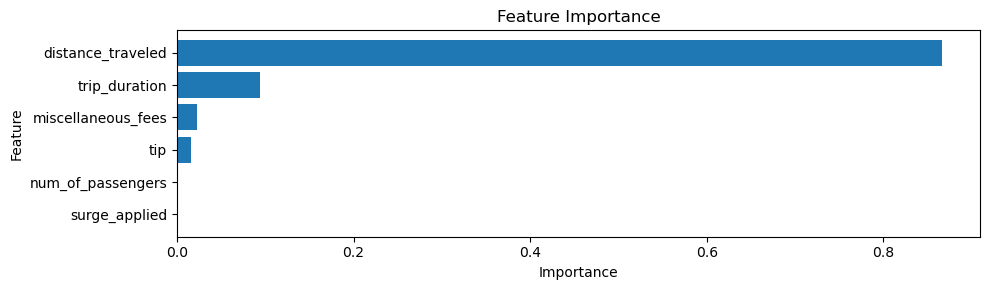

In [77]:
best_regressor = grid_search2.best_estimator_

# Obtain the feature importances from the best estimator
importances = best_regressor.named_steps['dtr2'].feature_importances_

# Sort the feature importances in descending order

indices = np.argsort(importances)
f=[]
j = list(indices)
for i in j:
    f.append(features[i])

# Plot the feature importances
plt.figure(figsize=(10, 3))
plt.title("Feature Importance")
plt.barh(range(xtrain.shape[1]), importances[indices], align="center")
plt.yticks(range(xtrain.shape[1]), f)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
pipeline3 = Pipeline([
    ('rfr2', RandomForestRegressor())
])

param_grid3 = {
    'rfr2__n_estimators': [500],
    'rfr2__max_depth': [10],
}

grid_search3 = GridSearchCV(pipeline3, param_grid3, cv=5)
grid_search3.fit(xtrain ,ytrain)

print('Parameters : ', grid_search3.best_params_,'\nAccuracy Score : ', grid_search3.best_score_)

Parameters :  {'rfr2__max_depth': 10, 'rfr2__n_estimators': 500} 
Accuracy Score :  0.9065704694597245


In [79]:
ypred3=grid_search3.predict(xtest)

rmsle3 = np.sqrt(mean_squared_log_error(ytest,ypred3))
print(f"Validation RMSLE: {rmsle3}")

sc3=r2_score(ytest,ypred3)
sc3

Validation RMSLE: 0.0866636160087268


0.9220815088085411

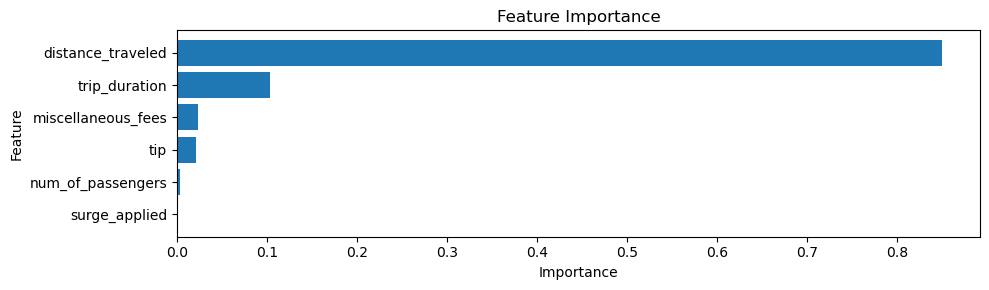

In [80]:
best_regressor = grid_search3.best_estimator_

# Obtain the feature importances from the best estimator
importances = best_regressor.named_steps['rfr2'].feature_importances_

# Sort the feature importances in descending order

indices = np.argsort(importances)
f=[]
j = list(indices)
for i in j:
    f.append(features[i])

# Plot the feature importances
plt.figure(figsize=(10, 3))
plt.title("Feature Importance")
plt.barh(range(xtrain.shape[1]), importances[indices], align="center")
plt.yticks(range(xtrain.shape[1]), f)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# XGBRF

In [81]:
from xgboost import XGBRFRegressor

pipeline4 = Pipeline([
    ('xgb2', XGBRFRegressor())
])

param_grid4 = {
    'xgb2__n_estimators': [500],
    'xgb2__max_depth': [15],
}

grid_search4 = GridSearchCV(pipeline4, param_grid4, cv=5)
grid_search4.fit(xtrain ,ytrain)

print('Parameters : ', grid_search4.best_params_,'\nAccuracy Score : ', grid_search4.best_score_)

Parameters :  {'xgb2__max_depth': 15, 'xgb2__n_estimators': 500} 
Accuracy Score :  0.8865062259188928


In [82]:
ypred4 = grid_search4.predict(xtest)

rmsle4 = np.sqrt(mean_squared_log_error(ytest, ypred4))
print(f"Validation RMSLE: {rmsle4}")
sc4 = r2_score(ytest, ypred4)
sc4

Validation RMSLE: 0.08704004907665824


0.9083866394614541

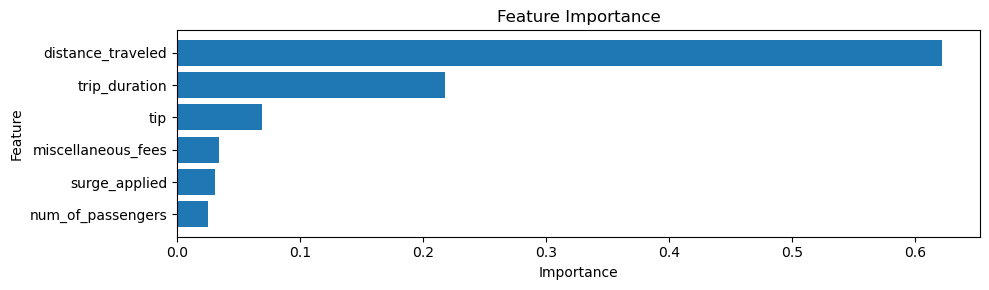

In [83]:
best_regressor = grid_search4.best_estimator_

# Obtain the feature importances from the best estimator
importances = best_regressor.named_steps['xgb2'].feature_importances_

# Sort the feature importances in descending order

indices = np.argsort(importances)
f=[]
j = list(indices)
for i in j:
    f.append(features[i])

# Plot the feature importances
plt.figure(figsize=(10, 3))
plt.title("Feature Importance")
plt.barh(range(xtrain.shape[1]), importances[indices], align="center")
plt.yticks(range(xtrain.shape[1]), f)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

ANN

In [97]:
# Create neural network
ann=tf.keras.models.Sequential()

# create input layer
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=80, activation='relu'))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann.add(tf.keras.layers.Dense(units=40, activation='relu'))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

# create output layer
ann.add(tf.keras.layers.Dense(units=1))

# Compile the network with stochastic gradient descent
ann.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the network
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), batch_size=64, epochs=100, callbacks=[early_stopping])


Epoch 1/100
2563/2563 [==============================] - 2s 740us/step - loss: 1061.9396 - val_loss: 591.0822
Epoch 2/100
2563/2563 [==============================] - 2s 718us/step - loss: 752.0450 - val_loss: 1044.9895
Epoch 3/100
2563/2563 [==============================] - 2s 719us/step - loss: 709.0541 - val_loss: 557.8215
Epoch 4/100
2563/2563 [==============================] - 2s 717us/step - loss: 681.9965 - val_loss: 524.2733
Epoch 5/100
2563/2563 [==============================] - 2s 718us/step - loss: 677.8148 - val_loss: 512.7599
Epoch 6/100
2563/2563 [==============================] - 2s 718us/step - loss: 676.3610 - val_loss: 496.2187
Epoch 7/100
2563/2563 [==============================] - 2s 719us/step - loss: 638.8615 - val_loss: 524.7570
Epoch 8/100
2563/2563 [==============================] - 2s 717us/step - loss: 628.3923 - val_loss: 507.7773
Epoch 9/100
2563/2563 [==============================] - 2s 722us/step - loss: 644.4710 - val_loss: 487.3176
Epoch 10/100
2563

In [102]:
ypred5=ann.predict(xtest)
ypred5=ypred5.reshape(len(ypred5),)
ypred5=np.absolute(ypred5)

1282/1282 [==============================] - 0s 296us/step


In [103]:
rmsle5=np.sqrt(mean_squared_log_error(ytest,ypred5))
print(f"validation RMSLE: {rmsle5}")

sc5 = r2_score(ytest, ypred5)
sc5

validation RMSLE: 0.09049257989815901


0.9234481453084955

Average Ensemble

In [106]:
#ypred6=np.mean([ypred3,ypred4,ypred5],axis=0)

ypred6 = np.mean([ypred3, ypred4, ypred5], axis=0)

rmsle6=np.sqrt(mean_squared_log_error(ytest,ypred6))
print(f"validation RMSLE: {rmsle5}")

sc6=r2_score(ytest,ypred6)
print("Ensemble R2 score:", sc6)

validation RMSLE: 0.09049257989815901
Ensemble R2 score: 0.9288113225989247


Model Comparision

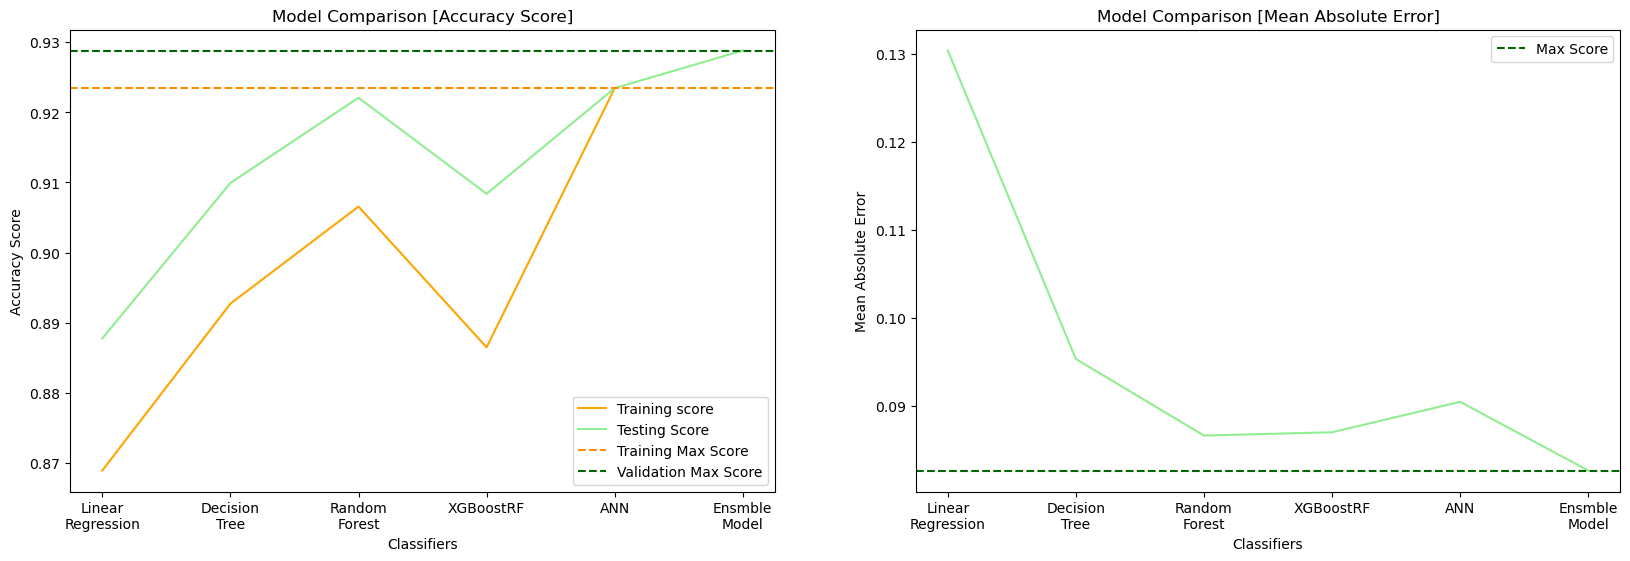

In [111]:
f,ax = plt.subplots(1,2, figsize=(20,6))

# Accuracy Score with training and validation scores

ax[0].plot(['Linear\nRegression','Decision\nTree','Random\nForest', 'XGBoostRF', 'ANN'],
         [grid_search1.best_score_,
          grid_search2.best_score_,
          grid_search3.best_score_,
          grid_search4.best_score_,
          sc5],
        color = 'Orange')

ax[0].plot(['Linear\nRegression','Decision\nTree','Random\nForest', 'XGBoostRF', 'ANN', 'Ensmble\nModel'],
         [sc1,sc2,sc3,sc4,sc5,sc6],
        color = 'lightgreen')

ax[0].axhline(y=max([grid_search1.best_score_,
          grid_search2.best_score_,
          grid_search3.best_score_,
          grid_search4.best_score_,
          sc5]), color='darkorange', linestyle='--', label='Training Max Score')

ax[0].axhline(y=max([sc1,sc2,sc3,sc4,sc5,sc6]), color='darkgreen', linestyle='--', label='Validation Max Score')

ax[0].legend(['Training score', 'Testing Score', 'Training Max Score', 'Validation Max Score'])
ax[0].set_ylabel('Accuracy Score')
ax[0].set_xlabel('Classifiers')
ax[0].set_title('Model Comparison [Accuracy Score]')

# Mean Absolute Error

ax[1].plot(['Linear\nRegression','Decision\nTree','Random\nForest', 'XGBoostRF', 'ANN', 'Ensmble\nModel'],
         [rmsle1, rmsle2, rmsle3, rmsle4, rmsle5, rmsle6],
        color = 'lightgreen')

ax[1].axhline(y=min([rmsle1, rmsle2, rmsle3, rmsle4, rmsle5, rmsle6]), color='darkgreen', linestyle='--', label='Max Score')
ax[1].legend()
ax[1].set_ylabel('Mean Absolute Error')
ax[1].set_xlabel('Classifiers')
ax[1].set_title('Model Comparison [Mean Absolute Error]')

plt.show()

Submission

In [112]:
features

['trip_duration',
 'distance_traveled',
 'num_of_passengers',
 'tip',
 'miscellaneous_fees',
 'surge_applied']

In [113]:
test['extra_fees'] =  test['miscellaneous_fees'] + test['tip']

In [114]:
test.columns.to_list()

['trip_duration',
 'distance_traveled',
 'num_of_passengers',
 'tip',
 'miscellaneous_fees',
 'surge_applied',
 'distance_m',
 'speed',
 'extra_fees']

In [115]:
# scaling data
testf=scaler.transform(test[features])

In [116]:
test.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
tip                   0
miscellaneous_fees    0
surge_applied         0
distance_m            0
speed                 0
extra_fees            0
dtype: int64

In [117]:
test.describe()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied,distance_m,speed,extra_fees
count,89861.000000,89861.000000,89861.000000,89861.000000,89861.000000,89861.000000,89861.000000,89861.000000,89861.000000
mean,876.882351,4.726807,1.285160,12.979546,15.166271,0.282280,4726.806779,5.264801,28.145817
std,703.086203,4.803057,0.915225,17.860478,12.378926,0.450112,4803.057247,2.444426,25.232961
min,60.000000,0.020000,0.000000,0.000000,-0.500000,0.000000,20.000000,0.007536,0.000000
25%,447.000000,1.950000,1.000000,0.000000,6.000000,0.000000,1950.000000,3.743386,9.750000
50%,705.000000,3.200000,1.000000,9.000000,9.750000,0.000000,3200.000000,4.703143,22.200000
75%,1090.000000,5.730000,1.000000,20.000000,26.450000,1.000000,5730.000000,6.108374,40.200000
max,26956.000000,114.390000,6.000000,456.000000,154.500000,1.000000,114390.000000,21.733535,532.575000


In [118]:
ypredf1=grid_search1.predict(testf)
ypredf2=grid_search2.predict(testf)
ypredf3 = grid_search3.predict(testf)
ypredf4 = grid_search4.predict(testf)
ypredf5 = ann.predict(testf)
ypredf5 = ypredf5.reshape(len(ypredf5),)

2809/2809 [==============================] - 1s 297us/step


In [119]:
ypredf = np.mean([ypredf5, ypredf3, ypredf4], axis=0)

In [120]:
ypredf.shape, submission.shape

((89861,), (89861, 1))

In [121]:
tot_fare = ypredf + test['extra_fees']

In [122]:
submission['total_fare'] = tot_fare

In [123]:
submission.isnull().sum()

total_fare    0
dtype: int64

In [124]:
submission

,total_fare
0,112.046039
1,60.897455
2,118.207961
3,89.910764
4,109.378490
...,...
89856,79.964649
89857,80.547668
89858,80.915596
89859,146.609532


In [125]:
# Save the test dataframe with the predictions for the final sample submission
submission.to_csv('submission.csv', index=False)